In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np


In [2]:
# 1. Create Dataset
# -------------------------------
data = {
    'customer_id':[1,2,3,4,5,6,7,8,9,10,11,12],
    'tenure':[5,20,2,35,12,40,3,24,1,30,4,15],
    'monthly_charges':[70,60,90,55,65,50,85,60,95,50,80,65],
    'total_charges':[350,1200,180,2100,780,2000,255,1440,95,1500,320,975],
    'contract_type':['Month-to-Month','One Year','Month-to-Month','Two Year','Month-to-Month','Two Year','Month-to-Month','One Year','Month-to-Month','Two Year','Month-to-Month','One Year'],
    'payment_method':['Online','Offline','Online','Offline','Online','Online','Offline','Online','Online','Offline','Online','Offline'],
    'churn':[1,0,1,0,1,0,1,0,1,0,1,0]
}

df = pd.DataFrame(data)


In [3]:
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract_type,payment_method,churn
0,1,5,70,350,Month-to-Month,Online,1
1,2,20,60,1200,One Year,Offline,0
2,3,2,90,180,Month-to-Month,Online,1
3,4,35,55,2100,Two Year,Offline,0
4,5,12,65,780,Month-to-Month,Online,1


In [4]:
# -------------------------------
# 2. Features and Target
# -------------------------------
X = df.drop(['customer_id','churn'], axis=1)
y = df['churn']

categorical_features = ['contract_type', 'payment_method']
numeric_features = ['tenure','monthly_charges','total_charges']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

In [5]:
# 3. ML Model Pipeline
# -------------------------------
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])


In [6]:
# 4. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['contract_type',
                                                   'payment_method']),
                                                 ('num', 'passthrough',
                                                  ['tenure', 'monthly_charges',
                                                   'total_charges'])])),
                ('clf', RandomForestClassifier(random_state=42))])

In [7]:
# 5. Predictions & Evaluation
# -------------------------------
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



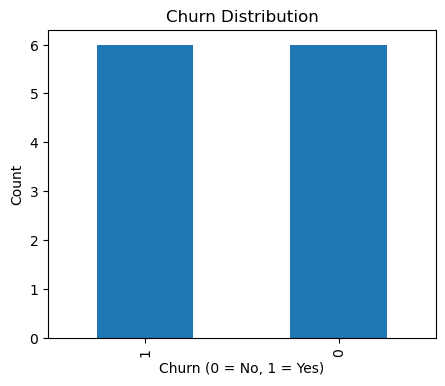

In [8]:
# 6. Visualization 1: Churn Count
# -------------------------------
plt.figure(figsize=(5,4))
df['churn'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


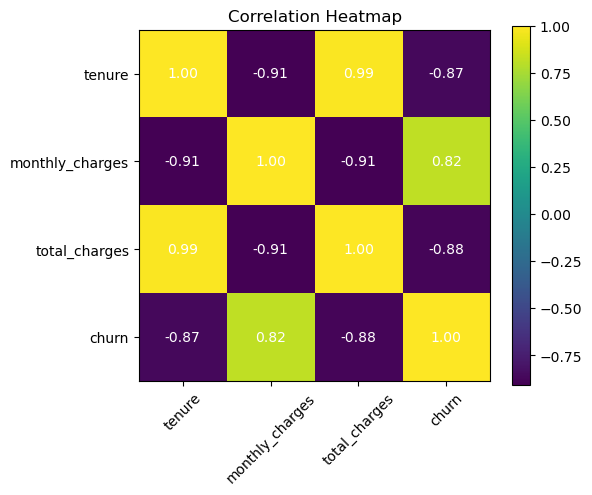

In [9]:
# 7. Visualization 2: Heatmap (Correlations)
# -------------------------------
corr = df[['tenure','monthly_charges','total_charges','churn']].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='viridis')
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

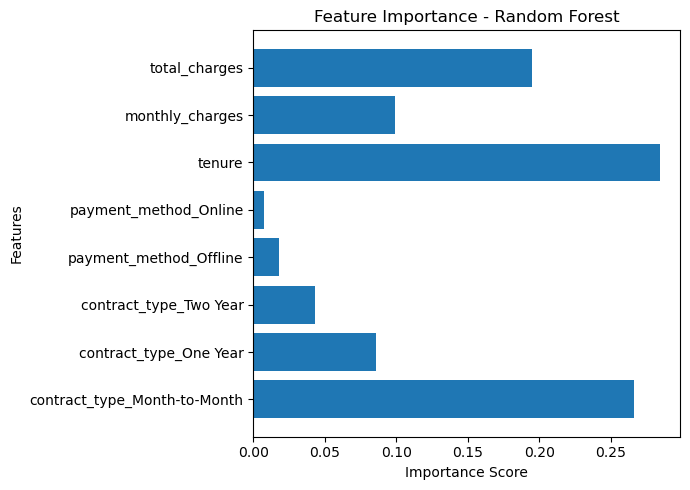

In [10]:
# 8. Visualization 3: Feature Importance
# -------------------------------
# Prepare feature names after encoding
encoded_cols = list(model.named_steps['preprocess']
                    .named_transformers_['cat']
                    .get_feature_names_out(categorical_features))

feature_names = encoded_cols + numeric_features

importances = model.named_steps['clf'].feature_importances_

plt.figure(figsize=(7,5))
plt.barh(feature_names, importances)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
